In [4]:
## Задача о Титанике с платформы Kaggle.com https://www.kaggle.com/c/titanic/overview


In [5]:
##Загрузка тестовых и проверочнымх датасетов

In [6]:
import pandas as pd

In [7]:
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'

In [8]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

In [9]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C


In [10]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
398,1290,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
299,1191,3,"Johansson, Mr. Nils",male,29.0,0,0,347467,7.8542,NaN,S
353,1245,2,"Herman, Mr. Samuel",male,49.0,1,2,220845,65.0000,NaN,S
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
#Колонки Age, Cabin содержат много пустых значений, так же пропущено одно значение в Fare, и несколько в Embarked

In [14]:
#Рассмотрим значения подробнее


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [17]:
# В таблице 891 уникальных имен, они не дадут нам пользы в обучении.
# Так же билеты не играют большой роли, они редко повторяются,
# вряд ли есть корреляция между билетом и выживаемостью.
# Cabin содержит много пустых ячеек, поэтому нам лучше убрать эту колонку.
# PassengerId не влияет на выживаемость, так что тоже уберем эту колонку(Оставим в test, потому что этого требует задание)
# Колонки Age и Embarked важны для обучения, поэтому нам придется заполнить ячейки без значения

In [18]:
un_cols = ['Ticket', 'Cabin', 'Name']

In [19]:
train = train.drop(columns = un_cols + ['PassengerId',])
test = test.drop(columns=un_cols)

In [20]:
# Проведем быстрый анализ на корелляции с колонками без пустых значений

In [21]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
# У первого класса выживаемость гораздо выше, поэтому стоит обратить внимание на эту характеристику

In [23]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
# У женщин намного больше шансов выжить, учтем это

In [25]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [27]:
# У этих двух параметров нет определенной корелляции, имеет смысл объединить их в одну колонку

In [28]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [29]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
#Эффективнее будет создать колонку IsAlone которая будет равна 1 если FamilySize<2


In [31]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [32]:
train = train.drop(columns=['SibSp', 'Parch', 'FamilySize'])
test = test.drop(columns=['SibSp', 'Parch', 'FamilySize'])

In [33]:
#Заполним пропущенные значения места посадки значением являющимся модой

In [34]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,NaN,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


In [35]:
mode_port = train.Embarked.dropna().mode()[0]
mode_port

'S'

In [36]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,NaN,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


In [37]:
train.Embarked = train.Embarked.fillna(mode_port)
test.Embarked = test.Embarked.fillna(mode_port)

In [38]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,male,34.5,7.8292,Q,0
1,893,3,female,47.0,7.0000,S,0
2,894,2,male,62.0,9.6875,Q,1
3,895,3,male,27.0,8.6625,S,0
4,896,3,female,22.0,12.2875,S,1
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,8.0500,S,1
414,1306,1,female,39.0,108.9000,C,1
415,1307,3,male,38.5,7.2500,S,1
416,1308,3,male,NaN,8.0500,S,0


In [39]:
# и переведем значения Embarked в числа

In [40]:
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [41]:
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [42]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,male,34.5,7.8292,2,0
1,893,3,female,47.0,7.0000,0,0
2,894,2,male,62.0,9.6875,2,1
3,895,3,male,27.0,8.6625,0,0
4,896,3,female,22.0,12.2875,0,1
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,8.0500,0,1
414,1306,1,female,39.0,108.9000,1,1
415,1307,3,male,38.5,7.2500,0,1
416,1308,3,male,NaN,8.0500,0,0


In [43]:
#и добавим отсутствующее значение в Fare

In [44]:
test['Fare'].fillna(test.Fare.dropna().median(), inplace=True)

In [45]:
# Объединим достаток на группы

In [46]:
train['FareBand'] = pd.qcut(train['Fare'], 4)

In [47]:
train[['FareBand', 'Survived']].groupby('FareBand').mean().sort_values(by='FareBand')

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [48]:
combine = (train, test)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(columns = ['FareBand',])
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,0,0,0
1,1,1,female,38.0,3,1,0
2,1,3,female,26.0,1,0,1
3,1,1,female,35.0,3,0,0
4,0,3,male,35.0,1,0,1
5,0,3,male,NaN,1,2,1
6,0,1,male,54.0,3,0,1
7,0,3,male,2.0,2,0,0
8,1,3,female,27.0,1,0,0
9,1,2,female,14.0,2,1,0


In [49]:
#Теперь заполним отсутствующие значения в Age
#Возможна корреляция с PClass и полом, поэтому я решил взять для каждой выборки по классу и полу взять среднее и стандартное
# отклонение, с помощью них сгенерировать возраст

In [50]:
# Но сначала изменил male на 0 и female на 1


In [51]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [52]:
import numpy.random as rnd
import numpy as np

In [53]:
guesses = [[0]*3]*2
for dataset in combine:
    for i in range(2):
        for k in range(1,4):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==k)]['Age'].dropna()
            age_mean = guess_df.mean()
            age_std = guess_df.std()
            guesses[i][k-1] = (age_mean-age_std, age_mean+age_std)
    for i in range(2):
        for k in range(1,4):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == k), 'Age'] = rnd.uniform(*guesses[i][k-1])
    
    dataset['Age'] = dataset['Age'].astype(int)
train

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22,0,0,0
1,1,1,1,38,3,1,0
2,1,3,1,26,1,0,1
3,1,1,1,35,3,0,0
4,0,3,0,35,1,0,1
...,...,...,...,...,...,...,...
886,0,2,0,27,1,0,1
887,1,1,1,19,2,0,1
888,0,3,1,25,2,0,0
889,1,1,0,26,2,1,1


In [54]:
#разделим Age на группы


In [55]:
train['AgeBand'] = pd.cut(train.Age, 5)

In [56]:
train[['AgeBand', 'Survived']].groupby('AgeBand').mean().sort_values(by='AgeBand')

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.332673
"(32.0, 48.0]",0.427184
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [57]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,AgeBand
0,0,3,0,1,0,0,0,"(16.0, 32.0]"
1,1,1,1,2,3,1,0,"(32.0, 48.0]"
2,1,3,1,1,1,0,1,"(16.0, 32.0]"
3,1,1,1,2,3,0,0,"(32.0, 48.0]"
4,0,3,0,2,1,0,1,"(32.0, 48.0]"


In [58]:
train = train.drop(columns=['AgeBand',])

In [59]:
# для модели предсказаний я решил использовать случайный лес, так как эта модель отлично подходит для работы с большим 
# количеством признаков и в целом показывает неплохие результаты в большинстве видов задач ML

In [60]:
from sklearn.ensemble import RandomForestClassifier


In [61]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop(columns=['PassengerId',]).copy()
X_train.shape, Y_train.shape

((891, 6), (891,))

In [62]:
test.sample(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
36,928,3,1,1,1,0,1
178,1070,2,1,2,3,0,1
15,907,2,1,1,2,1,1
304,1196,3,1,1,0,2,1
283,1175,3,1,0,2,1,1


In [65]:
#обучение и результаты предсказаний тестовых данных

In [66]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
 # итоговая таблица результатов, я залью ее на kaggle.com чтобы узнать точность предсказаний

In [68]:
test['Survived']=Y_pred
test = test[['PassengerId', 'Survived']]
test.to_csv('data/result.csv', index=False)

In [69]:
test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


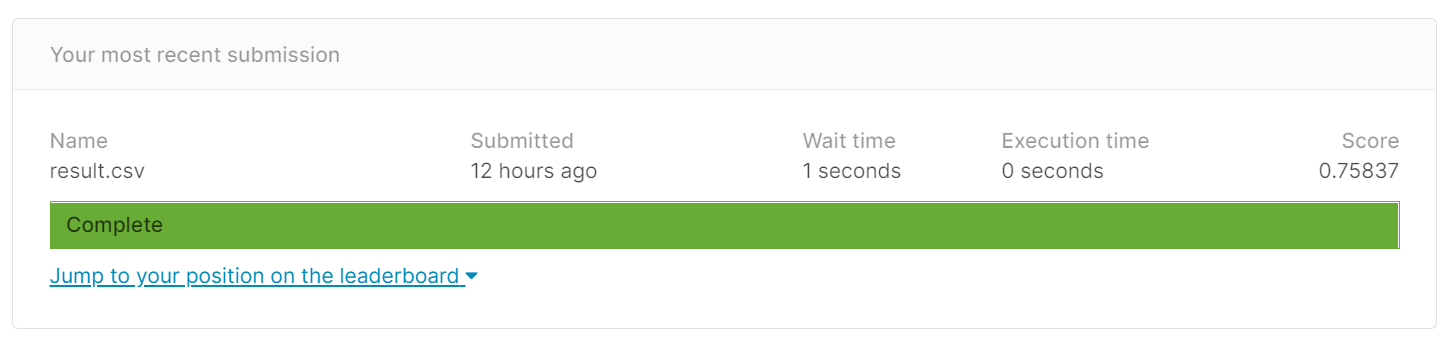

In [70]:
from IPython.display import Image
Image(filename='data/res.png')

In [71]:
# 75 процентов по моему мнению очень неплохой результат